In [1]:
import zfit 
import numpy as np
import tensorflow as tf
import scipy.stats
from zfit import z
import random

obs = zfit.Space("x", limits=(0, 10))

mu = zfit.Parameter("mu", 5., step_size=0)
sigma = zfit.Parameter("sigma", 1., step_size=0)

mu1 = zfit.Parameter("mu2", 5., 3, 7)
sigma1 = zfit.Parameter("sigma2", 1., 0.5, 2)

gauss = zfit.pdf.Gauss(mu=mu, sigma=sigma, obs=obs)

gauss1 = zfit.pdf.Gauss(mu=mu1, sigma=sigma1, obs=obs)
# data
n_sample = 1000

data = gauss.create_sampler(n_sample, limits=obs)
data.resample()
data_np = data[:, 0].numpy()
n_sim = 10
data_sim = gauss.create_sampler(n_sim, limits=obs)



/Users/bootcamp/.local/lib/python3.8/site-packages/zfit/util/execution.py:70: UserWarning: Not running on Linux. Determining available cpus for thread can failand be overestimated. Workaround (only if too many cpus are used):`zfit.run.set_n_cpu(your_cpu_number)`
  warnings.warn("Not running on Linux. Determining available cpus for thread can fail"


In [2]:
from scipy.stats import norm
minimizer = zfit.minimize.Minuit()
mean_bias = []
for i in range(0, 49):
    print("Номер прогона" + str(i))
    res = []
    data_sim.resample()
    nll1 = zfit.loss.UnbinnedNLL(model=gauss1, data=data_sim)
    result_sim = minimizer.minimize(nll1) 
    mu_sim = zfit.Parameter("mu_sim" + str(i), round(float(list(result_sim.error().keys())[0]), 3), step_size=0)
    sigma_sim = zfit.Parameter("sigma_sim" + str(i), round(float(list(result_sim.error().keys())[1]), 3), step_size=0)
    gauss_sim = zfit.pdf.Gauss(mu=mu_sim, sigma=sigma_sim, obs=obs)
    for i in range(0, 50):
        data.resample()
        print(i)
        nll2 = zfit.loss.UnbinnedNLL(model=gauss_sim, data=data) 
        result1 = minimizer.minimize(nll2) 
        value_stat = list(result1.error().keys())[0] 
        error_stat = list(result1.error().values())[0] 
        mu_value = float(value_stat.value()) 
        mu_up_error = float(error_stat.upper) 
        mu_low_error = float(error_stat.lower) 
        if(mu_value - 5 > 0): 
            mu_error = mu_up_error 
        else: 
            mu_error = abs(mu_low_error) 
        final_value = (5 - mu_value)/(mu_error) 
        if (abs(final_value) < 20): 
            res.append(final_value) 
    (mu, sigma) = norm.fit(res)
    mean_bias.append(mu)

Номер прогона0
------------------------------------------------------------------
| FCN = 14.84                   |      Ncalls=25 (25 total)      |
| EDM = 0.000103 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


/Users/bootcamp/.local/lib/python3.8/site-packages/zfit/minimizers/fitresult.py:358: FutureWarning: 'minuit_minos' will be changed as the default errors method to a custom implementationwith the same functionality. If you want to make sure that 'minuit_minos' will be used in the future, add it explicitly as in `errors(method='minuit_minos')`
  warnings.warn("'minuit_minos' will be changed as the default errors method to a custom implementation"


0
------------------------------------------------------------------
| FCN = 1448                    |      Ncalls=36 (36 total)      |
| EDM = 9.05e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1429                    |      Ncalls=36 (36 total)      |
| EDM = 1.22e-09 (Goal: 0.001)  |            up = 0.5     

------------------------------------------------------------------
11
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls=36 (36 total)      |
| EDM = 1.62e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1436                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
22
------------------------------------------------------------------
| FCN = 1388                    |      Ncalls=37 (37 total)      |
| EDM = 2.32e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1413                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
33
------------------------------------------------------------------
| FCN = 1411                    |      Ncalls=36 (36 total)      |
| EDM = 6.99e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1440                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
44
------------------------------------------------------------------
| FCN = 1433                    |      Ncalls=36 (36 total)      |
| EDM = 1.36e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
4
------------------------------------------------------------------
| FCN = 1442                    |      Ncalls=34 (34 total)      |
| EDM = 4.45e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1396                    |      Ncalls=37 (37 total

------------------------------------------------------------------
15
------------------------------------------------------------------
| FCN = 1425                    |      Ncalls=28 (28 total)      |
| EDM = 0.000255 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1381                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
26
------------------------------------------------------------------
| FCN = 1364                    |      Ncalls=34 (34 total)      |
| EDM = 3.04e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1467                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
37
------------------------------------------------------------------
| FCN = 1401                    |      Ncalls=36 (36 total)      |
| EDM = 1.62e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1444                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
48
------------------------------------------------------------------
| FCN = 1386                    |      Ncalls=34 (34 total)      |
| EDM = 1.95e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1456                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
8
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=33 (33 total)      |
| EDM = 4.68e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
9
------------------------------------------------------------------
| FCN = 1415                    |      Ncalls=26 (26 total

------------------------------------------------------------------
19
------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=34 (34 total)      |
| EDM = 1.41e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
20
------------------------------------------------------------------
| FCN = 1431                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
30
------------------------------------------------------------------
| FCN = 1433                    |      Ncalls=36 (36 total)      |
| EDM = 5.17e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
31
------------------------------------------------------------------
| FCN = 1431                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
41
------------------------------------------------------------------
| FCN = 1423                    |      Ncalls=36 (36 total)      |
| EDM = 4.36e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
42
------------------------------------------------------------------
| FCN = 1414                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1426                    |      Ncalls=36 (36 total)      |
| EDM = 6.73e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
2
------------------------------------------------------------------
| FCN = 1442                    |      Ncalls=28 (28 total

------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1409                    |      Ncalls=33 (33 total)      |
| EDM = 4.4e-06 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
13
------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1421                    |      Ncalls=28 (28 total)      |
| EDM = 0.000205 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
24
------------------------------------------------------------------
| FCN = 1443                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1395                    |      Ncalls=36 (36 total)      |
| EDM = 3.58e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
35
------------------------------------------------------------------
| FCN = 1431                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1465                    |      Ncalls=34 (34 total)      |
| EDM = 2.45e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
46
------------------------------------------------------------------
| FCN = 1441                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=28 (28 total)      |
| EDM = 1.67e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
6
------------------------------------------------------------------
| FCN = 1441                    |      Ncalls=36 (36 total

------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1432                    |      Ncalls=34 (34 total)      |
| EDM = 1.61e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
17
------------------------------------------------------------------
| FCN = 1453                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1394                    |      Ncalls=36 (36 total)      |
| EDM = 1.24e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
28
------------------------------------------------------------------
| FCN = 1417                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=28 (28 total)      |
| EDM = 7.36e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
39
------------------------------------------------------------------
| FCN = 1423                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1435                    |      Ncalls=28 (28 total)      |
| EDM = 0.000324 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Номер прогона5
------------------------------------------------------------------
| FCN = 15.75                   |      Ncall

------------------------------------------------------------------
9
------------------------------------------------------------------
| FCN = 1391                    |      Ncalls=34 (34 total)      |
| EDM = 6.88e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
10
------------------------------------------------------------------
| FCN = 1432                    |      Ncalls=34 (34 tota

------------------------------------------------------------------
20
------------------------------------------------------------------
| FCN = 1466                    |      Ncalls=36 (36 total)      |
| EDM = 5.17e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
21
------------------------------------------------------------------
| FCN = 1397                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
31
------------------------------------------------------------------
| FCN = 1453                    |      Ncalls=34 (34 total)      |
| EDM = 2e-05 (Goal: 0.001)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
32
------------------------------------------------------------------
| FCN = 1451                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
42
------------------------------------------------------------------
| FCN = 1401                    |      Ncalls=28 (28 total)      |
| EDM = 5.67e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
43
------------------------------------------------------------------
| FCN = 1433                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
2
------------------------------------------------------------------
| FCN = 1424                    |      Ncalls=33 (33 total)      |
| EDM = 1.4e-06 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
3
------------------------------------------------------------------
| FCN = 1393                    |      Ncalls=36 (36 total

------------------------------------------------------------------
13
------------------------------------------------------------------
| FCN = 1448                    |      Ncalls=35 (35 total)      |
| EDM = 3.46e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
14
------------------------------------------------------------------
| FCN = 1406                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
24
------------------------------------------------------------------
| FCN = 1396                    |      Ncalls=36 (36 total)      |
| EDM = 1.49e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
25
------------------------------------------------------------------
| FCN = 1436                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
35
------------------------------------------------------------------
| FCN = 1425                    |      Ncalls=28 (28 total)      |
| EDM = 1.04e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
36
------------------------------------------------------------------
| FCN = 1405                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
46
------------------------------------------------------------------
| FCN = 1375                    |      Ncalls=37 (37 total)      |
| EDM = 1.16e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
47
------------------------------------------------------------------
| FCN = 1405                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
6
------------------------------------------------------------------
| FCN = 1408                    |      Ncalls=33 (33 total)      |
| EDM = 0.000504 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
7
------------------------------------------------------------------
| FCN = 1388                    |      Ncalls=28 (28 total

------------------------------------------------------------------
17
------------------------------------------------------------------
| FCN = 1439                    |      Ncalls=36 (36 total)      |
| EDM = 3.19e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
18
------------------------------------------------------------------
| FCN = 1426                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
28
------------------------------------------------------------------
| FCN = 1443                    |      Ncalls=36 (36 total)      |
| EDM = 3.89e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
29
------------------------------------------------------------------
| FCN = 1411                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
39
------------------------------------------------------------------
| FCN = 1371                    |      Ncalls=35 (35 total)      |
| EDM = 1.56e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
40
------------------------------------------------------------------
| FCN = 1401                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
Номер прогона8
------------------------------------------------------------------
| FCN = 6.967                   |      Ncalls=71 (71 total)      |
| EDM = 1.96e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls

------------------------------------------------------------------
10
------------------------------------------------------------------
| FCN = 1388                    |      Ncalls=36 (36 total)      |
| EDM = 1.5e-06 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
11
------------------------------------------------------------------
| FCN = 1423                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
21
------------------------------------------------------------------
| FCN = 1404                    |      Ncalls=37 (37 total)      |
| EDM = 7.68e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
22
------------------------------------------------------------------
| FCN = 1392                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
32
------------------------------------------------------------------
| FCN = 1403                    |      Ncalls=36 (36 total)      |
| EDM = 1.36e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
33
------------------------------------------------------------------
| FCN = 1426                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
43
------------------------------------------------------------------
| FCN = 1417                    |      Ncalls=37 (37 total)      |
| EDM = 1.1e-07 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
44
------------------------------------------------------------------
| FCN = 1434                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
3
------------------------------------------------------------------
| FCN = 1450                    |      Ncalls=36 (36 total)      |
| EDM = 3.32e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
4
------------------------------------------------------------------
| FCN = 1392                    |      Ncalls=35 (35 total

------------------------------------------------------------------
14
------------------------------------------------------------------
| FCN = 1396                    |      Ncalls=36 (36 total)      |
| EDM = 1.08e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
15
------------------------------------------------------------------
| FCN = 1408                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
25
------------------------------------------------------------------
| FCN = 1403                    |      Ncalls=36 (36 total)      |
| EDM = 6.72e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
26
------------------------------------------------------------------
| FCN = 1415                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
36
------------------------------------------------------------------
| FCN = 1406                    |      Ncalls=28 (28 total)      |
| EDM = 1.52e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
37
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
47
------------------------------------------------------------------
| FCN = 1401                    |      Ncalls=28 (28 total)      |
| EDM = 0.000277 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
48
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
7
------------------------------------------------------------------
| FCN = 1402                    |      Ncalls=36 (36 total)      |
| EDM = 1.66e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
8
------------------------------------------------------------------
| FCN = 1421                    |      Ncalls=28 (28 total

------------------------------------------------------------------
18
------------------------------------------------------------------
| FCN = 1441                    |      Ncalls=36 (36 total)      |
| EDM = 6.2e-08 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
19
------------------------------------------------------------------
| FCN = 1424                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
29
------------------------------------------------------------------
| FCN = 1402                    |      Ncalls=28 (28 total)      |
| EDM = 0.000282 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
30
------------------------------------------------------------------
| FCN = 1415                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
40
------------------------------------------------------------------
| FCN = 1406                    |      Ncalls=34 (34 total)      |
| EDM = 1.58e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
41
------------------------------------------------------------------
| FCN = 1414                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
0
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=43 (43 total)      |
| EDM = 0.000163 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls=33 (33 total

------------------------------------------------------------------
11
------------------------------------------------------------------
| FCN = 1433                    |      Ncalls=36 (36 total)      |
| EDM = 2.8e-05 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1436                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
22
------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=26 (26 total)      |
| EDM = 0.000298 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1415                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
33
------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=28 (28 total)      |
| EDM = 2.22e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
44
------------------------------------------------------------------
| FCN = 1380                    |      Ncalls=37 (37 total)      |
| EDM = 3.63e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1394                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
4
------------------------------------------------------------------
| FCN = 1396                    |      Ncalls=37 (37 total)      |
| EDM = 2.07e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1389                    |      Ncalls=28 (28 total

------------------------------------------------------------------
15
------------------------------------------------------------------
| FCN = 1421                    |      Ncalls=36 (36 total)      |
| EDM = 1.17e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1430                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
26
------------------------------------------------------------------
| FCN = 1424                    |      Ncalls=36 (36 total)      |
| EDM = 5.02e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1397                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
37
------------------------------------------------------------------
| FCN = 1426                    |      Ncalls=36 (36 total)      |
| EDM = 8.43e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1410                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
48
------------------------------------------------------------------
| FCN = 1417                    |      Ncalls=28 (28 total)      |
| EDM = 2.5e-05 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1437                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
8
------------------------------------------------------------------
| FCN = 1455                    |      Ncalls=28 (28 total)      |
| EDM = 2.61e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
9
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=34 (34 total

------------------------------------------------------------------
19
------------------------------------------------------------------
| FCN = 1397                    |      Ncalls=28 (28 total)      |
| EDM = 0.000312 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
20
------------------------------------------------------------------
| FCN = 1382                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
30
------------------------------------------------------------------
| FCN = 1480                    |      Ncalls=36 (36 total)      |
| EDM = 1.76e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
31
------------------------------------------------------------------
| FCN = 1440                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
41
------------------------------------------------------------------
| FCN = 1428                    |      Ncalls=34 (34 total)      |
| EDM = 2.4e-06 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
42
------------------------------------------------------------------
| FCN = 1358                    |      Ncalls=35 (35 tot

------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1378                    |      Ncalls=36 (36 total)      |
| EDM = 5.86e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
2
------------------------------------------------------------------
| FCN = 1425                    |      Ncalls=34 (34 total

------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1439                    |      Ncalls=28 (28 total)      |
| EDM = 0.000122 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
13
------------------------------------------------------------------
| FCN = 1409                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=28 (28 total)      |
| EDM = 9.14e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
24
------------------------------------------------------------------
| FCN = 1399                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1426                    |      Ncalls=28 (28 total)      |
| EDM = 9.3e-07 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
35
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1453                    |      Ncalls=28 (28 total)      |
| EDM = 0.000194 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
46
------------------------------------------------------------------
| FCN = 1357                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1401                    |      Ncalls=36 (36 total)      |
| EDM = 3.76e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
6
------------------------------------------------------------------
| FCN = 1434                    |      Ncalls=36 (36 total

------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1375                    |      Ncalls=28 (28 total)      |
| EDM = 0.000121 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
17
------------------------------------------------------------------
| FCN = 1395                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=36 (36 total)      |
| EDM = 4.61e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
28
------------------------------------------------------------------
| FCN = 1401                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1444                    |      Ncalls=37 (37 total)      |
| EDM = 1.53e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
39
------------------------------------------------------------------
| FCN = 1411                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1378                    |      Ncalls=36 (36 total)      |
| EDM = 2.37e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Номер прогона16
------------------------------------------------------------------
| FCN = 13.68                   |      Ncal

------------------------------------------------------------------
9
------------------------------------------------------------------
| FCN = 1415                    |      Ncalls=33 (33 total)      |
| EDM = 9.48e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
10
------------------------------------------------------------------
| FCN = 1417                    |      Ncalls=28 (28 tota

------------------------------------------------------------------
20
------------------------------------------------------------------
| FCN = 1423                    |      Ncalls=36 (36 total)      |
| EDM = 1.38e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
21
------------------------------------------------------------------
| FCN = 1371                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
31
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=36 (36 total)      |
| EDM = 4.51e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
32
------------------------------------------------------------------
| FCN = 1455                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
42
------------------------------------------------------------------
| FCN = 1402                    |      Ncalls=36 (36 total)      |
| EDM = 6.04e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
43
------------------------------------------------------------------
| FCN = 1423                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
2
------------------------------------------------------------------
| FCN = 1391                    |      Ncalls=37 (37 total)      |
| EDM = 5.78e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
3
------------------------------------------------------------------
| FCN = 1403                    |      Ncalls=28 (28 total

------------------------------------------------------------------
13
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=33 (33 total)      |
| EDM = 1.91e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
14
------------------------------------------------------------------
| FCN = 1415                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
24
------------------------------------------------------------------
| FCN = 1396                    |      Ncalls=36 (36 total)      |
| EDM = 3.6e-08 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
25
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
35
------------------------------------------------------------------
| FCN = 1448                    |      Ncalls=36 (36 total)      |
| EDM = 5.07e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
36
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
46
------------------------------------------------------------------
| FCN = 1373                    |      Ncalls=35 (35 total)      |
| EDM = 8.44e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
47
------------------------------------------------------------------
| FCN = 1444                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
6
------------------------------------------------------------------
| FCN = 1442                    |      Ncalls=37 (37 total)      |
| EDM = 1.16e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
7
------------------------------------------------------------------
| FCN = 1443                    |      Ncalls=33 (33 total

------------------------------------------------------------------
17
------------------------------------------------------------------
| FCN = 1391                    |      Ncalls=34 (34 total)      |
| EDM = 1.88e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
18
------------------------------------------------------------------
| FCN = 1407                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
28
------------------------------------------------------------------
| FCN = 1395                    |      Ncalls=33 (33 total)      |
| EDM = 2.01e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
29
------------------------------------------------------------------
| FCN = 1433                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
39
------------------------------------------------------------------
| FCN = 1399                    |      Ncalls=28 (28 total)      |
| EDM = 0.000172 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
40
------------------------------------------------------------------
| FCN = 1406                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
Номер прогона19
------------------------------------------------------------------
| FCN = 15.4                    |      Ncalls=35 (35 total)      |
| EDM = 0.00011 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0
------------------------------------------------------------------
| FCN = 1406                    |      Ncall

------------------------------------------------------------------
10
------------------------------------------------------------------
| FCN = 1423                    |      Ncalls=28 (28 total)      |
| EDM = 1.86e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
11
------------------------------------------------------------------
| FCN = 1453                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
21
------------------------------------------------------------------
| FCN = 1424                    |      Ncalls=33 (33 total)      |
| EDM = 7.87e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
22
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
32
------------------------------------------------------------------
| FCN = 1453                    |      Ncalls=36 (36 total)      |
| EDM = 2e-08 (Goal: 0.001)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
33
------------------------------------------------------------------
| FCN = 1444                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
43
------------------------------------------------------------------
| FCN = 1426                    |      Ncalls=36 (36 total)      |
| EDM = 1.18e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
44
------------------------------------------------------------------
| FCN = 1438                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
3
------------------------------------------------------------------
| FCN = 1424                    |      Ncalls=33 (33 total)      |
| EDM = 3.32e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
4
------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=33 (33 total

------------------------------------------------------------------
14
------------------------------------------------------------------
| FCN = 1405                    |      Ncalls=33 (33 total)      |
| EDM = 4.57e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
15
------------------------------------------------------------------
| FCN = 1450                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
25
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=35 (35 total)      |
| EDM = 2.29e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
26
------------------------------------------------------------------
| FCN = 1423                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
36
------------------------------------------------------------------
| FCN = 1413                    |      Ncalls=26 (26 total)      |
| EDM = 6.62e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
37
------------------------------------------------------------------
| FCN = 1394                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
47
------------------------------------------------------------------
| FCN = 1423                    |      Ncalls=33 (33 total)      |
| EDM = 1.4e-06 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
48
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
7
------------------------------------------------------------------
| FCN = 1438                    |      Ncalls=36 (36 total)      |
| EDM = 8.36e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
8
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls=36 (36 total

------------------------------------------------------------------
18
------------------------------------------------------------------
| FCN = 1395                    |      Ncalls=37 (37 total)      |
| EDM = 1.63e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
19
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
29
------------------------------------------------------------------
| FCN = 1408                    |      Ncalls=36 (36 total)      |
| EDM = 1.04e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
30
------------------------------------------------------------------
| FCN = 1449                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
40
------------------------------------------------------------------
| FCN = 1415                    |      Ncalls=33 (33 total)      |
| EDM = 4.8e-06 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
41
------------------------------------------------------------------
| FCN = 1454                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
0
------------------------------------------------------------------
| FCN = 1407                    |      Ncalls=35 (35 total)      |
| EDM = 2.44e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=28 (28 total

------------------------------------------------------------------
11
------------------------------------------------------------------
| FCN = 1434                    |      Ncalls=28 (28 total)      |
| EDM = 0.00038 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1456                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
22
------------------------------------------------------------------
| FCN = 1396                    |      Ncalls=28 (28 total)      |
| EDM = 2.28e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1410                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
33
------------------------------------------------------------------
| FCN = 1397                    |      Ncalls=36 (36 total)      |
| EDM = 4.96e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
44
------------------------------------------------------------------
| FCN = 1385                    |      Ncalls=36 (36 total)      |
| EDM = 2.95e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1401                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
4
------------------------------------------------------------------
| FCN = 1385                    |      Ncalls=36 (36 total)      |
| EDM = 4.02e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1403                    |      Ncalls=33 (33 total

------------------------------------------------------------------
15
------------------------------------------------------------------
| FCN = 1444                    |      Ncalls=36 (36 total)      |
| EDM = 1.95e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1402                    |      Ncalls=42 (42 tot

------------------------------------------------------------------
26
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=36 (36 total)      |
| EDM = 7.78e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1432                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
37
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=28 (28 total)      |
| EDM = 6.49e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
48
------------------------------------------------------------------
| FCN = 1393                    |      Ncalls=36 (36 total)      |
| EDM = 7.86e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1424                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
8
------------------------------------------------------------------
| FCN = 1404                    |      Ncalls=37 (37 total)      |
| EDM = 4.81e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
9
------------------------------------------------------------------
| FCN = 1425                    |      Ncalls=28 (28 total

------------------------------------------------------------------
19
------------------------------------------------------------------
| FCN = 1384                    |      Ncalls=37 (37 total)      |
| EDM = 8.62e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
20
------------------------------------------------------------------
| FCN = 1399                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
30
------------------------------------------------------------------
| FCN = 1434                    |      Ncalls=34 (34 total)      |
| EDM = 1.04e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
31
------------------------------------------------------------------
| FCN = 1433                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
41
------------------------------------------------------------------
| FCN = 1431                    |      Ncalls=28 (28 total)      |
| EDM = 2.72e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
42
------------------------------------------------------------------
| FCN = 1428                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1409                    |      Ncalls=36 (36 total)      |
| EDM = 2.81e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
2
------------------------------------------------------------------
| FCN = 1409                    |      Ncalls=28 (28 total

------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1353                    |      Ncalls=36 (36 total)      |
| EDM = 1.66e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
13
------------------------------------------------------------------
| FCN = 1426                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1398                    |      Ncalls=36 (36 total)      |
| EDM = 1.85e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
24
------------------------------------------------------------------
| FCN = 1437                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1394                    |      Ncalls=37 (37 total)      |
| EDM = 2.01e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
35
------------------------------------------------------------------
| FCN = 1437                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1451                    |      Ncalls=28 (28 total)      |
| EDM = 3.51e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
46
------------------------------------------------------------------
| FCN = 1403                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1406                    |      Ncalls=36 (36 total)      |
| EDM = 6.05e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
6
------------------------------------------------------------------
| FCN = 1405                    |      Ncalls=28 (28 total

------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1425                    |      Ncalls=36 (36 total)      |
| EDM = 1.8e-09 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
17
------------------------------------------------------------------
| FCN = 1401                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1417                    |      Ncalls=36 (36 total)      |
| EDM = 2.78e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
28
------------------------------------------------------------------
| FCN = 1421                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls=36 (36 total)      |
| EDM = 5.18e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
39
------------------------------------------------------------------
| FCN = 1370                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1430                    |      Ncalls=36 (36 total)      |
| EDM = 1.41e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Номер прогона27
------------------------------------------------------------------
| FCN = 12.53                   |      Ncal

------------------------------------------------------------------
9
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls=33 (33 total)      |
| EDM = 7.42e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
10
------------------------------------------------------------------
| FCN = 1412                    |      Ncalls=33 (33 tota

------------------------------------------------------------------
20
------------------------------------------------------------------
| FCN = 1372                    |      Ncalls=28 (28 total)      |
| EDM = 1.93e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
21
------------------------------------------------------------------
| FCN = 1402                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
31
------------------------------------------------------------------
| FCN = 1403                    |      Ncalls=30 (30 total)      |
| EDM = 2.17e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
32
------------------------------------------------------------------
| FCN = 1352                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
42
------------------------------------------------------------------
| FCN = 1400                    |      Ncalls=36 (36 total)      |
| EDM = 2.38e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
43
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
2
------------------------------------------------------------------
| FCN = 1382                    |      Ncalls=36 (36 total)      |
| EDM = 6.95e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
3
------------------------------------------------------------------
| FCN = 1455                    |      Ncalls=36 (36 total

------------------------------------------------------------------
13
------------------------------------------------------------------
| FCN = 1439                    |      Ncalls=36 (36 total)      |
| EDM = 2.04e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
14
------------------------------------------------------------------
| FCN = 1433                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
24
------------------------------------------------------------------
| FCN = 1437                    |      Ncalls=28 (28 total)      |
| EDM = 2.01e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
25
------------------------------------------------------------------
| FCN = 1428                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
35
------------------------------------------------------------------
| FCN = 1401                    |      Ncalls=28 (28 total)      |
| EDM = 8.34e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
36
------------------------------------------------------------------
| FCN = 1446                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
46
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=30 (30 total)      |
| EDM = 1.11e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
47
------------------------------------------------------------------
| FCN = 1444                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
6
------------------------------------------------------------------
| FCN = 1452                    |      Ncalls=28 (28 total)      |
| EDM = 5.73e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
7
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=36 (36 total

------------------------------------------------------------------
17
------------------------------------------------------------------
| FCN = 1429                    |      Ncalls=35 (35 total)      |
| EDM = 1.57e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
18
------------------------------------------------------------------
| FCN = 1411                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
28
------------------------------------------------------------------
| FCN = 1426                    |      Ncalls=28 (28 total)      |
| EDM = 0.00025 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
29
------------------------------------------------------------------
| FCN = 1432                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
39
------------------------------------------------------------------
| FCN = 1421                    |      Ncalls=28 (28 total)      |
| EDM = 4.75e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
40
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
Номер прогона30
------------------------------------------------------------------
| FCN = 11.58                   |      Ncalls=36 (36 total)      |
| EDM = 3.59e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0
------------------------------------------------------------------
| FCN = 1421                    |      Ncall

------------------------------------------------------------------
10
------------------------------------------------------------------
| FCN = 1412                    |      Ncalls=33 (33 total)      |
| EDM = 2.07e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
11
------------------------------------------------------------------
| FCN = 1406                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
21
------------------------------------------------------------------
| FCN = 1428                    |      Ncalls=34 (34 total)      |
| EDM = 1.27e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
22
------------------------------------------------------------------
| FCN = 1444                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
32
------------------------------------------------------------------
| FCN = 1432                    |      Ncalls=36 (36 total)      |
| EDM = 1.1e-07 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
33
------------------------------------------------------------------
| FCN = 1391                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
43
------------------------------------------------------------------
| FCN = 1406                    |      Ncalls=37 (37 total)      |
| EDM = 5.31e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
44
------------------------------------------------------------------
| FCN = 1448                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
3
------------------------------------------------------------------
| FCN = 1382                    |      Ncalls=36 (36 total)      |
| EDM = 3.16e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
4
------------------------------------------------------------------
| FCN = 1438                    |      Ncalls=34 (34 total

------------------------------------------------------------------
14
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=28 (28 total)      |
| EDM = 9.66e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
15
------------------------------------------------------------------
| FCN = 1423                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
25
------------------------------------------------------------------
| FCN = 1433                    |      Ncalls=36 (36 total)      |
| EDM = 2.01e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
26
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
36
------------------------------------------------------------------
| FCN = 1405                    |      Ncalls=36 (36 total)      |
| EDM = 1.09e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
37
------------------------------------------------------------------
| FCN = 1395                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
47
------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=34 (34 total)      |
| EDM = 4.55e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
48
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
7
------------------------------------------------------------------
| FCN = 1405                    |      Ncalls=36 (36 total)      |
| EDM = 2.01e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
8
------------------------------------------------------------------
| FCN = 1438                    |      Ncalls=36 (36 total

------------------------------------------------------------------
18
------------------------------------------------------------------
| FCN = 1410                    |      Ncalls=26 (26 total)      |
| EDM = 8.95e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
19
------------------------------------------------------------------
| FCN = 1410                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
29
------------------------------------------------------------------
| FCN = 1442                    |      Ncalls=34 (34 total)      |
| EDM = 3.69e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
30
------------------------------------------------------------------
| FCN = 1432                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
40
------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=36 (36 total)      |
| EDM = 1.87e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
41
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=35 (35 tot

------------------------------------------------------------------
0
------------------------------------------------------------------
| FCN = 1412                    |      Ncalls=50 (50 total)      |
| EDM = 7.55e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1421                    |      Ncalls=28 (28 total

------------------------------------------------------------------
11
------------------------------------------------------------------
| FCN = 1397                    |      Ncalls=33 (33 total)      |
| EDM = 4.18e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1411                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
22
------------------------------------------------------------------
| FCN = 1443                    |      Ncalls=37 (37 total)      |
| EDM = 3.18e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
33
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=34 (34 total)      |
| EDM = 1.72e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1415                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
44
------------------------------------------------------------------
| FCN = 1431                    |      Ncalls=28 (28 total)      |
| EDM = 5.3e-07 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1430                    |      Ncalls=30 (30 tot

------------------------------------------------------------------
4
------------------------------------------------------------------
| FCN = 1447                    |      Ncalls=36 (36 total)      |
| EDM = 2.31e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1401                    |      Ncalls=37 (37 total

------------------------------------------------------------------
15
------------------------------------------------------------------
| FCN = 1426                    |      Ncalls=28 (28 total)      |
| EDM = 3.65e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1455                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
26
------------------------------------------------------------------
| FCN = 1450                    |      Ncalls=36 (36 total)      |
| EDM = 1.07e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
37
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=36 (36 total)      |
| EDM = 3.13e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1403                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
48
------------------------------------------------------------------
| FCN = 1442                    |      Ncalls=36 (36 total)      |
| EDM = 6.04e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1409                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
8
------------------------------------------------------------------
| FCN = 1423                    |      Ncalls=28 (28 total)      |
| EDM = 0.000283 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
9
------------------------------------------------------------------
| FCN = 1412                    |      Ncalls=36 (36 total

------------------------------------------------------------------
19
------------------------------------------------------------------
| FCN = 1375                    |      Ncalls=37 (37 total)      |
| EDM = 1.16e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
20
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
30
------------------------------------------------------------------
| FCN = 1431                    |      Ncalls=33 (33 total)      |
| EDM = 1.19e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
31
------------------------------------------------------------------
| FCN = 1394                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
41
------------------------------------------------------------------
| FCN = 1428                    |      Ncalls=37 (37 total)      |
| EDM = 2.63e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
42
------------------------------------------------------------------
| FCN = 1397                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1408                    |      Ncalls=33 (33 total)      |
| EDM = 6.66e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
2
------------------------------------------------------------------
| FCN = 1411                    |      Ncalls=28 (28 total

------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1409                    |      Ncalls=35 (35 total)      |
| EDM = 1.66e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
13
------------------------------------------------------------------
| FCN = 1410                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1406                    |      Ncalls=31 (31 total)      |
| EDM = 0.000151 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
24
------------------------------------------------------------------
| FCN = 1438                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1413                    |      Ncalls=36 (36 total)      |
| EDM = 4.91e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
35
------------------------------------------------------------------
| FCN = 1417                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1434                    |      Ncalls=36 (36 total)      |
| EDM = 1.29e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
46
------------------------------------------------------------------
| FCN = 1439                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1429                    |      Ncalls=34 (34 total)      |
| EDM = 5.84e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
6
------------------------------------------------------------------
| FCN = 1445                    |      Ncalls=28 (28 total

------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls=28 (28 total)      |
| EDM = 0.00035 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
17
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=30 (30 tot

------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1413                    |      Ncalls=33 (33 total)      |
| EDM = 1.24e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
28
------------------------------------------------------------------
| FCN = 1451                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1400                    |      Ncalls=34 (34 total)      |
| EDM = 3.32e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
39
------------------------------------------------------------------
| FCN = 1457                    |      Ncalls=35 (35 tot

------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1457                    |      Ncalls=34 (34 total)      |
| EDM = 2.34e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Номер прогона38
------------------------------------------------------------------
| FCN = 17.71                   |      Ncal

------------------------------------------------------------------
9
------------------------------------------------------------------
| FCN = 1424                    |      Ncalls=28 (28 total)      |
| EDM = 9.24e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
10
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=28 (28 tota

------------------------------------------------------------------
20
------------------------------------------------------------------
| FCN = 1403                    |      Ncalls=34 (34 total)      |
| EDM = 3.7e-07 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
21
------------------------------------------------------------------
| FCN = 1459                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
31
------------------------------------------------------------------
| FCN = 1391                    |      Ncalls=28 (28 total)      |
| EDM = 7.99e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
32
------------------------------------------------------------------
| FCN = 1443                    |      Ncalls=35 (35 tot

------------------------------------------------------------------
42
------------------------------------------------------------------
| FCN = 1430                    |      Ncalls=34 (34 total)      |
| EDM = 2.51e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
43
------------------------------------------------------------------
| FCN = 1413                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
2
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls=28 (28 total)      |
| EDM = 0.000114 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
3
------------------------------------------------------------------
| FCN = 1387                    |      Ncalls=36 (36 total

------------------------------------------------------------------
13
------------------------------------------------------------------
| FCN = 1399                    |      Ncalls=36 (36 total)      |
| EDM = 5.64e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
14
------------------------------------------------------------------
| FCN = 1457                    |      Ncalls=35 (35 tot

------------------------------------------------------------------
24
------------------------------------------------------------------
| FCN = 1424                    |      Ncalls=28 (28 total)      |
| EDM = 0.000272 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
25
------------------------------------------------------------------
| FCN = 1402                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
35
------------------------------------------------------------------
| FCN = 1436                    |      Ncalls=28 (28 total)      |
| EDM = 3.42e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
36
------------------------------------------------------------------
| FCN = 1410                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
46
------------------------------------------------------------------
| FCN = 1404                    |      Ncalls=28 (28 total)      |
| EDM = 0.000153 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
47
------------------------------------------------------------------
| FCN = 1431                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
6
------------------------------------------------------------------
| FCN = 1434                    |      Ncalls=35 (35 total)      |
| EDM = 1.12e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
7
------------------------------------------------------------------
| FCN = 1400                    |      Ncalls=37 (37 total

------------------------------------------------------------------
17
------------------------------------------------------------------
| FCN = 1424                    |      Ncalls=36 (36 total)      |
| EDM = 4.97e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
18
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
28
------------------------------------------------------------------
| FCN = 1450                    |      Ncalls=36 (36 total)      |
| EDM = 1.24e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
29
------------------------------------------------------------------
| FCN = 1383                    |      Ncalls=35 (35 tot

------------------------------------------------------------------
39
------------------------------------------------------------------
| FCN = 1413                    |      Ncalls=28 (28 total)      |
| EDM = 0.000115 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
40
------------------------------------------------------------------
| FCN = 1406                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
Номер прогона41
------------------------------------------------------------------
| FCN = 15.26                   |      Ncalls=41 (41 total)      |
| EDM = 1.2e-06 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0
------------------------------------------------------------------
| FCN = 1469                    |      Ncall

------------------------------------------------------------------
10
------------------------------------------------------------------
| FCN = 1417                    |      Ncalls=28 (28 total)      |
| EDM = 0.000134 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
11
------------------------------------------------------------------
| FCN = 1398                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
21
------------------------------------------------------------------
| FCN = 1430                    |      Ncalls=36 (36 total)      |
| EDM = 4.82e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
22
------------------------------------------------------------------
| FCN = 1417                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
32
------------------------------------------------------------------
| FCN = 1380                    |      Ncalls=37 (37 total)      |
| EDM = 1.35e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
33
------------------------------------------------------------------
| FCN = 1377                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
43
------------------------------------------------------------------
| FCN = 1402                    |      Ncalls=34 (34 total)      |
| EDM = 3.09e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
44
------------------------------------------------------------------
| FCN = 1421                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
3
------------------------------------------------------------------
| FCN = 1403                    |      Ncalls=36 (36 total)      |
| EDM = 6.54e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
4
------------------------------------------------------------------
| FCN = 1406                    |      Ncalls=36 (36 total

------------------------------------------------------------------
14
------------------------------------------------------------------
| FCN = 1409                    |      Ncalls=28 (28 total)      |
| EDM = 5.81e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
15
------------------------------------------------------------------
| FCN = 1390                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
25
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=33 (33 total)      |
| EDM = 0.00012 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
26
------------------------------------------------------------------
| FCN = 1441                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
36
------------------------------------------------------------------
| FCN = 1434                    |      Ncalls=28 (28 total)      |
| EDM = 6.63e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
37
------------------------------------------------------------------
| FCN = 1387                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
47
------------------------------------------------------------------
| FCN = 1400                    |      Ncalls=35 (35 total)      |
| EDM = 1.06e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
48
------------------------------------------------------------------
| FCN = 1439                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
7
------------------------------------------------------------------
| FCN = 1405                    |      Ncalls=33 (33 total)      |
| EDM = 4.66e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
8
------------------------------------------------------------------
| FCN = 1442                    |      Ncalls=36 (36 total

------------------------------------------------------------------
18
------------------------------------------------------------------
| FCN = 1413                    |      Ncalls=28 (28 total)      |
| EDM = 5.74e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
19
------------------------------------------------------------------
| FCN = 1454                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
29
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls=34 (34 total)      |
| EDM = 0.000156 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
30
------------------------------------------------------------------
| FCN = 1388                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
40
------------------------------------------------------------------
| FCN = 1396                    |      Ncalls=36 (36 total)      |
| EDM = 1.03e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
41
------------------------------------------------------------------
| FCN = 1440                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
0
------------------------------------------------------------------
| FCN = 1452                    |      Ncalls=35 (35 total)      |
| EDM = 1.02e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=36 (36 total

------------------------------------------------------------------
11
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=31 (31 total)      |
| EDM = 2.06e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1405                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
22
------------------------------------------------------------------
| FCN = 1399                    |      Ncalls=36 (36 total)      |
| EDM = 2.83e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1433                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
33
------------------------------------------------------------------
| FCN = 1400                    |      Ncalls=36 (36 total)      |
| EDM = 3.01e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1405                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
44
------------------------------------------------------------------
| FCN = 1389                    |      Ncalls=33 (33 total)      |
| EDM = 2.68e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1395                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
4
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls=34 (34 total)      |
| EDM = 9.97e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1406                    |      Ncalls=33 (33 total

------------------------------------------------------------------
15
------------------------------------------------------------------
| FCN = 1404                    |      Ncalls=36 (36 total)      |
| EDM = 1.15e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1404                    |      Ncalls=26 (26 tot

------------------------------------------------------------------
26
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=34 (34 total)      |
| EDM = 5.42e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
37
------------------------------------------------------------------
| FCN = 1459                    |      Ncalls=35 (35 total)      |
| EDM = 3.47e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1465                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
48
------------------------------------------------------------------
| FCN = 1430                    |      Ncalls=28 (28 total)      |
| EDM = 5.92e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1396                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
8
------------------------------------------------------------------
| FCN = 1450                    |      Ncalls=34 (34 total)      |
| EDM = 9.27e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
9
------------------------------------------------------------------
| FCN = 1451                    |      Ncalls=28 (28 total

------------------------------------------------------------------
19
------------------------------------------------------------------
| FCN = 1431                    |      Ncalls=28 (28 total)      |
| EDM = 1.84e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
20
------------------------------------------------------------------
| FCN = 1383                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
30
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls=28 (28 total)      |
| EDM = 0.000289 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
31
------------------------------------------------------------------
| FCN = 1415                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
41
------------------------------------------------------------------
| FCN = 1414                    |      Ncalls=36 (36 total)      |
| EDM = 7.78e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
42
------------------------------------------------------------------
| FCN = 1407                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1456                    |      Ncalls=37 (37 total)      |
| EDM = 4.25e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
2
------------------------------------------------------------------
| FCN = 1447                    |      Ncalls=28 (28 total

------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1421                    |      Ncalls=37 (37 total)      |
| EDM = 5.42e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
13
------------------------------------------------------------------
| FCN = 1412                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=36 (36 total)      |
| EDM = 1.99e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
24
------------------------------------------------------------------
| FCN = 1445                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls=28 (28 total)      |
| EDM = 0.000177 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
35
------------------------------------------------------------------
| FCN = 1395                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1407                    |      Ncalls=37 (37 total)      |
| EDM = 2.5e-07 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
46
------------------------------------------------------------------
| FCN = 1432                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1428                    |      Ncalls=33 (33 total)      |
| EDM = 1.74e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
6
------------------------------------------------------------------
| FCN = 1421                    |      Ncalls=28 (28 total

------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1406                    |      Ncalls=28 (28 total)      |
| EDM = 0.000107 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
17
------------------------------------------------------------------
| FCN = 1413                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1442                    |      Ncalls=33 (33 total)      |
| EDM = 1.19e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
28
------------------------------------------------------------------
| FCN = 1429                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1438                    |      Ncalls=36 (36 total)      |
| EDM = 1.23e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
39
------------------------------------------------------------------
| FCN = 1402                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1459                    |      Ncalls=36 (36 total)      |
| EDM = 8.32e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


(array([1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 3.,
        1., 2., 3., 3., 2., 2., 0., 0., 2., 3., 1., 3., 2., 1., 1., 1., 2.,
        0., 1., 2., 0., 1., 2., 0., 2., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-3.43493399e-01, -3.29180690e-01, -3.14867981e-01, -3.00555272e-01,
        -2.86242563e-01, -2.71929853e-01, -2.57617144e-01, -2.43304435e-01,
        -2.28991726e-01, -2.14679017e-01, -2.00366308e-01, -1.86053599e-01,
        -1.71740889e-01, -1.57428180e-01, -1.43115471e-01, -1.28802762e-01,
        -1.14490053e-01, -1.00177344e-01, -8.58646344e-02, -7.15519253e-02,
        -5.72392161e-02, -4.29265070e-02, -2.86137978e-02, -1.43010887e-02,
         1.16204644e-05,  1.43243296e-02,  2.86370388e-02,  4.29497479e-02,
         5.72624571e-02,  7.15751662e-02,  8.58878754e-02,  1.00200585e-01,
         1.14513294e-01,  1.28826003e-01,  1.43138712e-01,  1.57451421e-01,
         1.71764130e-01,  1.86076839e-01,  2.00389549e-01,  2.14702258e-01,
         2.290

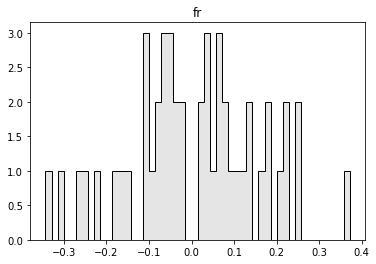

In [3]:
import matplotlib.pyplot as plt 
color = 'black' 
plt.figure() 
plt.title("fr") 
# plot the data 
n, bins, patches = plt.hist(mean_bias, color=color, bins=50, histtype="stepfilled", alpha=0.1) 
plt.hist(mean_bias, color=color, bins=50, histtype="step")

Text(-0.3, 4, 'sigma= 0.154')

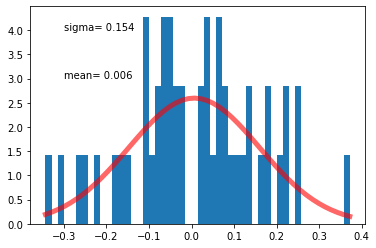

In [6]:
from scipy.stats import norm
(mu, sigma) = norm.fit(mean_bias) 

pdf_x = np.linspace(np.min(mean_bias),np.max(mean_bias),50)
n, bins, patches = plt.hist(mean_bias, bins = 50, density=True,)
plt.plot(pdf_x, norm.pdf(pdf_x, loc = mu, scale = sigma ), 'r-', lw=5, alpha=0.6, label='norm pdf')
plt.text(-0.3, 3, "mean= " + str(round(mu, 3)))
plt.text(-0.3, 4, "sigma= " + str(round(sigma, 3)))